In [1]:
import extinction
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

%matplotlib widget

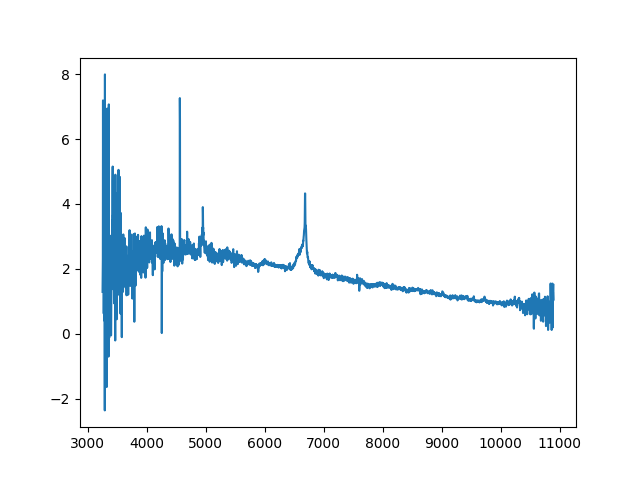

In [2]:
spectra_file = '/Users/zgl12/SN2019vxm_2020-03-13_KAST.txt'
spectra = np.genfromtxt(spectra_file, comments='#')

plt.figure()
plt.plot(spectra[:,0], spectra[:,1])
plt.show()

In [3]:
V_band_file = '/Users/zgl12/Downloads/LasCumbres_LasCumbres.Bessel_V.dat'


V_band = np.genfromtxt(V_band_file)

wave = V_band[:,0]
transmission = V_band[:,1]

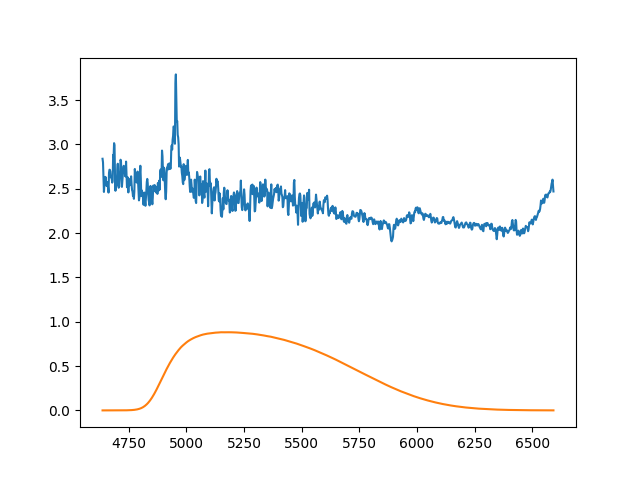

In [5]:
spectra_transmission = np.interp(wave, spectra[:,0], spectra[:,1])

plt.figure()
plt.plot(wave, spectra_transmission)
plt.plot(wave, transmission)
plt.show()

In [6]:
A_lambda = extinction.fm07(wave, 0.65, unit='aa')
attenuation = 10**(-0.4 * A_lambda) # Convert extinction to transmission factor

num = np.trapz(spectra_transmission*transmission * attenuation, wave) # Weighted average extinction in this band
den = np.trapz(spectra_transmission*transmission, wave)
A_band = -2.5 * np.log10(num / den)

print("Effective extinction in band:", A_band, "mag")

Effective extinction in band: 0.6799043302216394 mag
